<a href="https://colab.research.google.com/github/winry6/AI-tool-front-end-code/blob/main/01_2_sample_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Get the current notebook's path
notebook_path = '/content/drive/MyDrive/Instacart_TPP/LLM_MTTP/01'

# Change the current working directory
os.chdir(notebook_path)

print(f"Current working directory: {os.getcwd()}")

Mounted at /content/drive
Current working directory: /content/drive/MyDrive/Instacart_TPP/LLM_MTTP/01


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# Read the parquet file
df = pd.read_pickle('all_orders_with_details.pkl')


In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346083 entries, 0 to 3346082
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3346083 non-null  uint32 
 1   user_id                 3346083 non-null  uint32 
 2   order_number            3346083 non-null  uint8  
 3   order_dow               3346083 non-null  uint8  
 4   order_hour_of_day       3346083 non-null  uint8  
 5   days_since_prior_order  3346083 non-null  uint8  
 6   cumsum_day              3346083 non-null  uint16 
 7   timestamp               3346083 non-null  float32
 8   order_details           3346083 non-null  object 
dtypes: float32(1), object(1), uint16(1), uint32(2), uint8(4)
memory usage: 83.0+ MB


In [ ]:
df.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,cumsum_day,timestamp,order_details
0,1,112108,4,4,10,9,31,31.416666,Reordered items:\n- canned goods: Lightly Smok...
1,36,79431,23,6,18,30,345,345.750000,Reordered items:\n- beverages: Spring Water\n-...
2,38,42756,6,6,16,24,112,112.666664,Reordered items:\n- produce: Organic Baby Arug...
3,96,17227,7,6,20,30,126,126.833336,Reordered items:\n- deli: Roasted Turkey\n- fr...
4,98,56463,41,3,8,14,362,362.333344,Reordered items:\n- bakery: Corn Maize Tortill...
5,112,125030,5,5,14,26,84,84.583336,Reordered items:\n- produce: Fresh Cauliflower...
6,170,182389,7,0,13,14,122,122.541664,Reordered items:\n- bakery: 100% Whole Wheat B...
7,218,98711,12,0,21,17,213,213.875000,Reordered items:\n- beverages: Natural Artisan...
8,226,51011,4,0,12,30,90,90.500000,Reordered items:\n- babies: Take & Toss 10oz C...
9,349,156353,9,3,16,30,218,218.666672,Reordered items:\n- dairy eggs: Pure Irish But...


In [ ]:
len(df['user_id'].unique())

206209

In [ ]:
from itertools import chain

# 1) Select only those rows where a user has >1 order at the exact same timestamp
dup_df = df[df.duplicated(subset=['user_id', 'timestamp'], keep=False)]


In [ ]:
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40333 entries, 42 to 3346057
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                40333 non-null  uint32 
 1   user_id                 40333 non-null  uint32 
 2   order_number            40333 non-null  uint8  
 3   order_dow               40333 non-null  uint8  
 4   order_hour_of_day       40333 non-null  uint8  
 5   days_since_prior_order  40333 non-null  uint8  
 6   cumsum_day              40333 non-null  uint16 
 7   timestamp               40333 non-null  float32
 8   order_details           40333 non-null  object 
dtypes: float32(1), object(1), uint16(1), uint32(2), uint8(4)
memory usage: 1.3+ MB


In [ ]:
dup_df.head(20)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,cumsum_day,timestamp,order_details
42,1579,94042,11,5,15,0,29,29.625000,"Reordered items:\n- beverages: Water, Grapefru..."
193,4935,170218,16,5,18,0,55,55.750000,Reordered items:\n- alcohol: Vodka
317,7746,111262,4,2,18,0,60,60.750000,Reordered items:\n- bakery: 100% Whole Wheat B...
513,13235,38398,5,0,9,0,14,14.375000,Reordered items:\n- breakfast: Gluten Free Old...
586,15113,11726,7,0,18,0,130,130.750000,Reordered items:\n- dairy eggs: Organic Grade ...
719,18742,198364,9,0,6,0,155,155.250000,Reordered items:\n- produce: Fuji Apples Bag
773,19871,204925,18,5,17,0,291,291.708344,"Reordered items:\n- beverages: 100% Juice, App..."
777,19977,50160,4,4,13,0,60,60.541668,Reordered items:\n- dairy eggs: Fat Free Milk
919,23412,168257,16,2,11,0,108,108.458336,Reordered items:\n- babies: Stage 1 Apples Swe...
1154,29750,27930,7,6,19,0,96,96.791664,"Reordered items:\n- bakery: French Baguettes, ..."


In [ ]:
# 1) Sort by user_id, timestamp, then order_number so “first” picks the row with the min order_number
dup_df_sorted = dup_df.sort_values(['user_id', 'timestamp', 'order_number'])

# 2) Group and aggregate
merged_dup_df = dup_df_sorted.groupby(['user_id', 'timestamp'], as_index=False).agg(
    order_id=('order_id', 'first'),
    order_number=('order_number', 'first'),
    order_dow=('order_dow', 'first'),
    order_hour_of_day=('order_hour_of_day', 'first'),
    days_since_prior_order=('days_since_prior_order', 'first'),
    cumsum_day=('cumsum_day', 'first'),
    timestamp=('timestamp', 'first'),
    store_number=('order_details', 'size'),
    order_details=('order_details', lambda x: "".join(
        f"\n From store {i+1}: \n{d}"
        for i, d in enumerate(x.fillna(''))
    ))
)


In [ ]:
dup_df_sorted.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,cumsum_day,timestamp,order_details
2220379,94891,4,4,5,13,15,55,55.541668,New items:\n- alcohol: Extra-Dry Cava\n- bever...
1834582,2557754,4,5,5,13,0,55,55.541668,"New items:\n- deli: Real Guacamole, Roasted Pi..."
2293884,173172,24,18,0,16,14,264,264.666656,"Reordered items:\n- beverages: 100% Juice, Var..."
37385,965160,24,19,0,16,0,264,264.666656,"Reordered items:\n- beverages: 100% Juice, Var..."
1451899,2150649,31,1,5,11,0,0,0.458333,New items:\n- beverages: Unsweetened Premium I...


In [ ]:
print(merged_dup_df["order_details"][0])


 From store 1: 
New items:
- alcohol: Extra-Dry Cava
- beverages: Original Orange Juice
 From store 2: 
New items:
- deli: Real Guacamole, Roasted Pine Nut Hummus
- snacks: Yellow Corn Tortilla Chips


In [ ]:
# 1) Identify all rows involved in multi-order groups
mask = df.duplicated(subset=['user_id', 'timestamp'], keep=False)

# 2) Keep only the “singleton” orders and add store_number = 1
df_single = df[~mask].copy()
df_single['store_number'] = 1

# 3) Your aggregated multi-order DataFrame already has store_number >1
#    (as computed in merged_dup_df)

# 4) Concatenate singletons + merged duplicates
df_final = pd.concat(
    [df_single, merged_dup_df],
    ignore_index=True,
    sort=False
)

# 5) (Optionally) restore sort order and reset index
df_final = (
    df_final
    .sort_values(['user_id', 'timestamp', 'order_number'])
    .reset_index(drop=True)
)


In [ ]:
df_final.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3325578 entries, 0 to 3325577
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3325578 non-null  uint32 
 1   user_id                 3325578 non-null  uint32 
 2   order_number            3325578 non-null  uint8  
 3   order_dow               3325578 non-null  uint8  
 4   order_hour_of_day       3325578 non-null  uint8  
 5   days_since_prior_order  3325578 non-null  uint8  
 6   cumsum_day              3325578 non-null  uint16 
 7   timestamp               3325578 non-null  float32
 8   order_details           3325578 non-null  object 
 9   store_number            3325578 non-null  int64  
dtypes: float32(1), int64(1), object(1), uint16(1), uint32(2), uint8(4)
memory usage: 107.8+ MB


In [ ]:
# convert order_id from float64 → uint32
df_final['order_id'] = df_final['order_id'].astype('uint32')
# convert store_number from int64 → uint8
df_final['store_number'] = df_final['store_number'].astype('uint8')


In [ ]:
# 1) sort by user and time
df_final = df_final.sort_values(['user_id', 'timestamp'])

# 2) assign a new, continuous order_number = 1,2,3… within each user
df_final['order_number_new'] = (
    df_final
      .groupby('user_id')
      .cumcount()            # 0,1,2,...
      .add(1)                # → 1,2,3,...
      .astype('uint8')       # fit it into 1 byte
)



In [ ]:
df_final.to_pickle('all_orders_with_details_merged.pkl')

In [ ]:
df_final = pd.read_pickle('all_orders_with_details_merged.pkl')

In [ ]:
del df
df = df_final.copy()

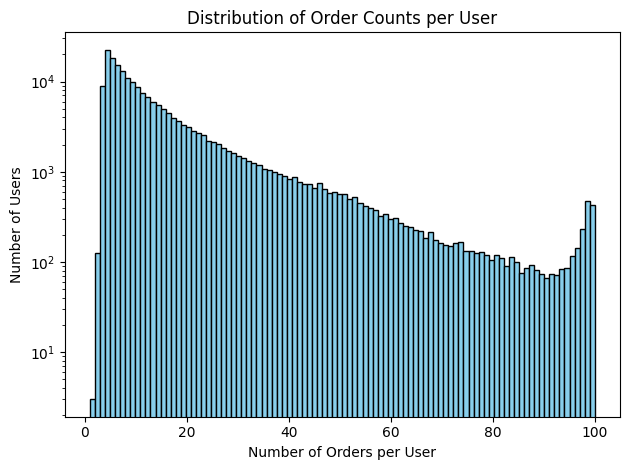

In [ ]:
# Compute number of orders per user
order_counts = df['user_id'].value_counts()

# Plot the distribution
plt.figure()
plt.hist(order_counts, bins=100, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.xlabel('Number of Orders per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Order Counts per User')
plt.tight_layout()
plt.show()

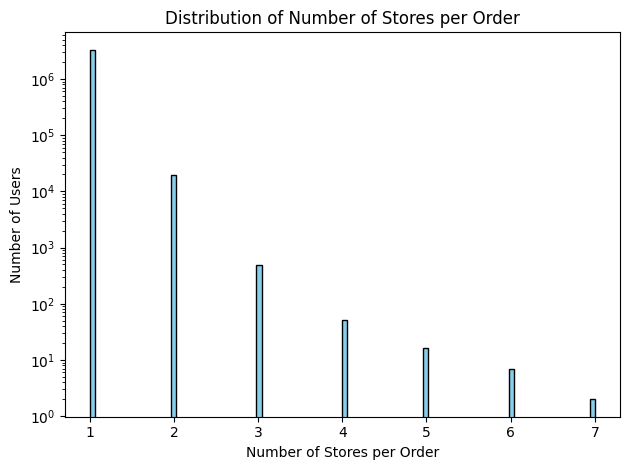

In [ ]:
# Compute number of orders per user
order_counts = df['store_number']

# Plot the distribution
plt.figure()
plt.hist(order_counts, bins=100, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.xlabel('Number of Stores per Order')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Stores per Order')
plt.tight_layout()
plt.show()

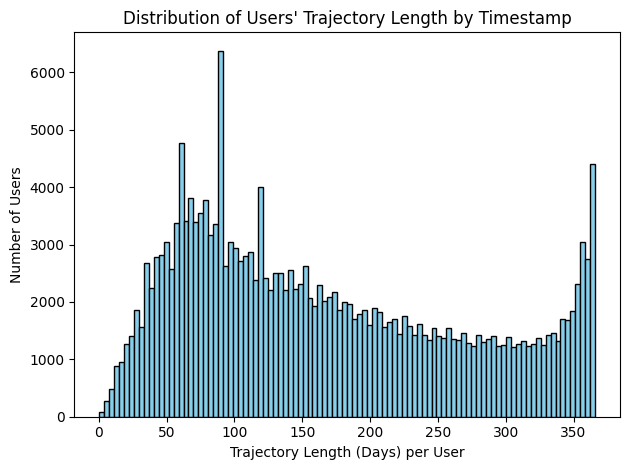

In [ ]:
# Calculate the most recent timestamp per user
max_timestamps = df.groupby('user_id')['timestamp'].max()

# Visualize the distribution of latest timestamps
import matplotlib.pyplot as plt

plt.figure()
plt.hist(max_timestamps, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Trajectory Length (Days) per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Users\' Trajectory Length by Timestamp')
plt.tight_layout()
plt.show()

In [ ]:
# Create a summary DataFrame with order counts and most recent timestamp per user
user_stats_df = df.groupby('user_id').agg(
    order_counts=('order_number', 'count'),
    max_timestamp=('timestamp', 'max')
).reset_index()

# Verify
user_stats_df.head()


,user_id,order_counts,max_timestamp
0,1,11,190.333328
1,2,15,228.458328
2,3,12,133.625000
3,4,4,55.541668
4,5,5,46.458332


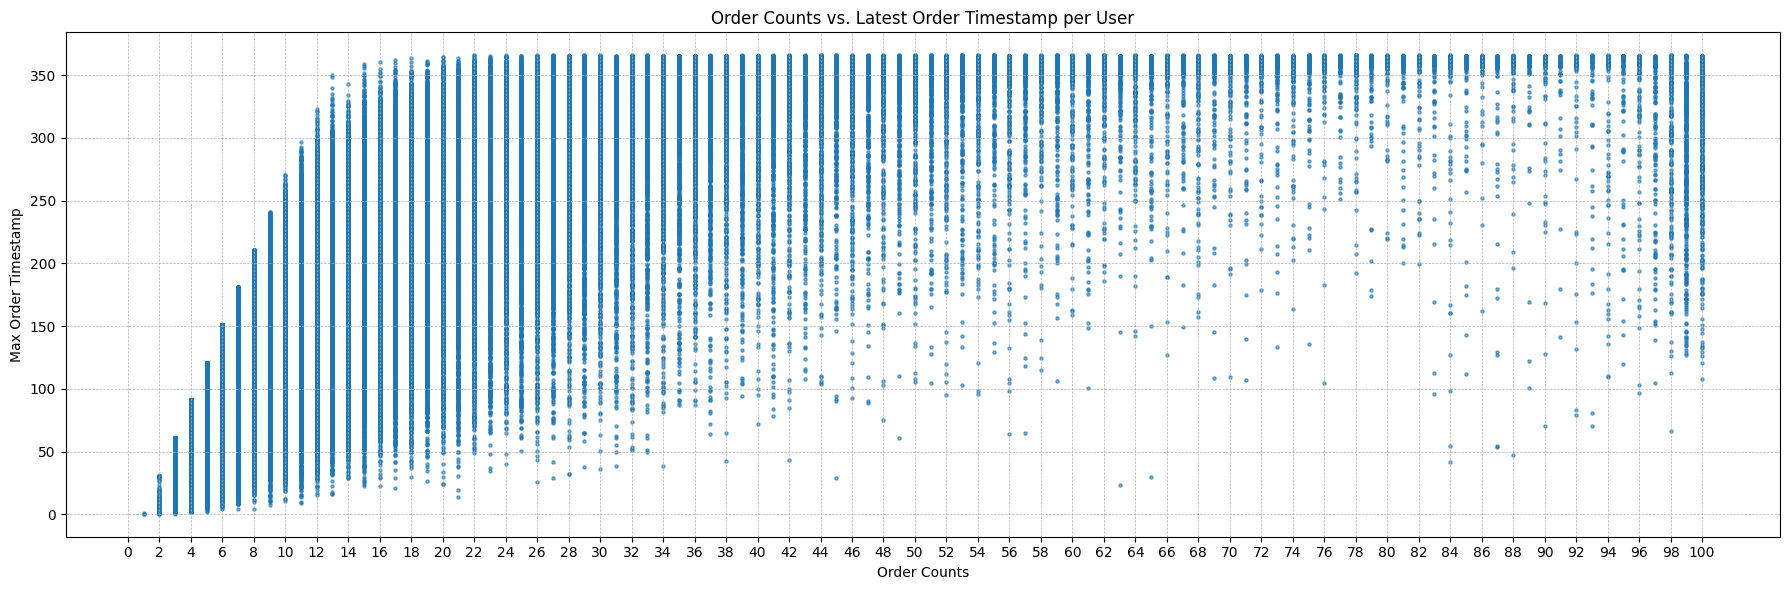

In [ ]:
# Scatter plot of order counts vs. most recent timestamp
plt.figure(figsize=(18, 6))
plt.scatter(user_stats_df['order_counts'], user_stats_df['max_timestamp'],
            s=5,         # dot size
            alpha=0.6
            )
plt.xlabel('Order Counts')
plt.ylabel('Max Order Timestamp')
plt.title('Order Counts vs. Latest Order Timestamp per User')
# set x‐ticks every 5 orders (or whatever granularity you like)
max_orders = user_stats_df['order_counts'].max()
plt.xticks(range(0, max_orders + 1, 2))

# draw a light grid on both axes
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 1) Add avg_order_time column
user_stats_df['avg_order_time'] = user_stats_df['max_timestamp'] / user_stats_df['order_counts']


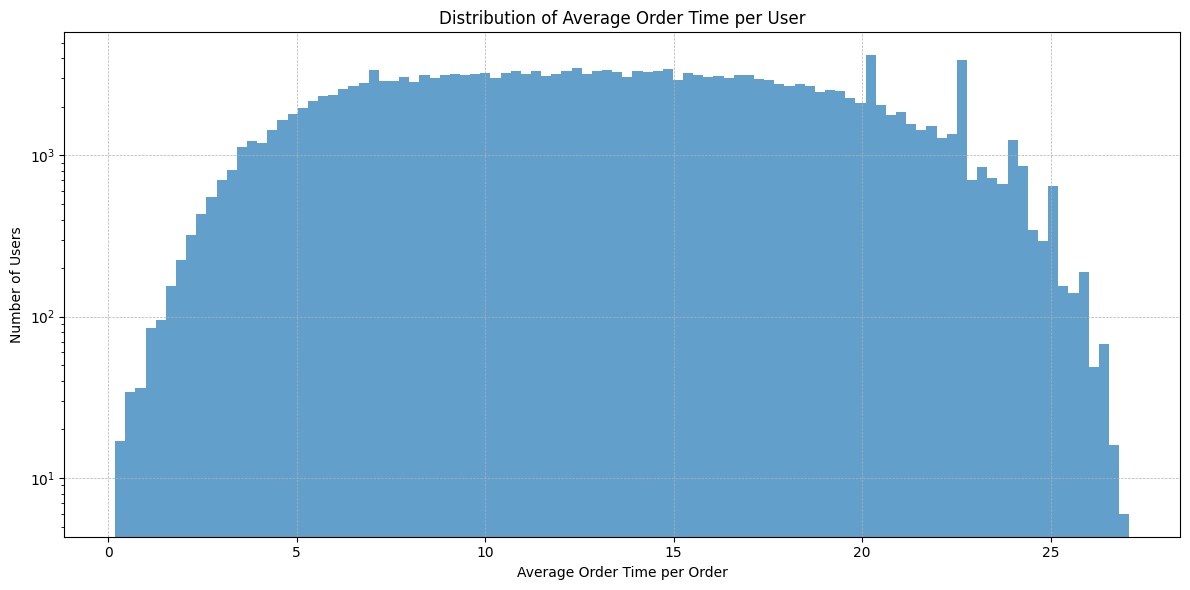

In [ ]:
# 2) Visualize the distribution of average order time

plt.figure(figsize=(12, 6))
plt.hist(user_stats_df['avg_order_time'],bins=100, alpha=0.7)
plt.xlabel('Average Order Time per Order')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.title('Distribution of Average Order Time per User')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

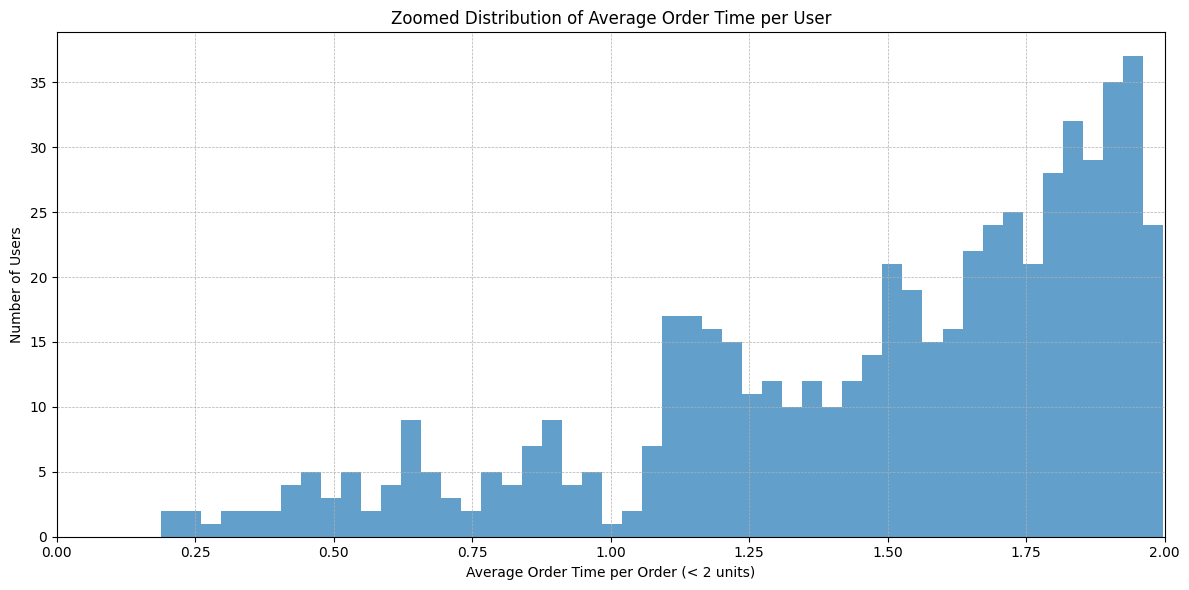

In [ ]:
# Filter users with avg_order_time < 2
low_avg = user_stats_df.loc[user_stats_df['avg_order_time'] < 2, 'avg_order_time']

plt.figure(figsize=(12, 6))
plt.hist(low_avg, bins=50, alpha=0.7)
plt.xlabel('Average Order Time per Order (< 2 units)')
plt.ylabel('Number of Users')
plt.title('Zoomed Distribution of Average Order Time per User')
plt.xlim(0, 2)                   # focus on values below 2
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


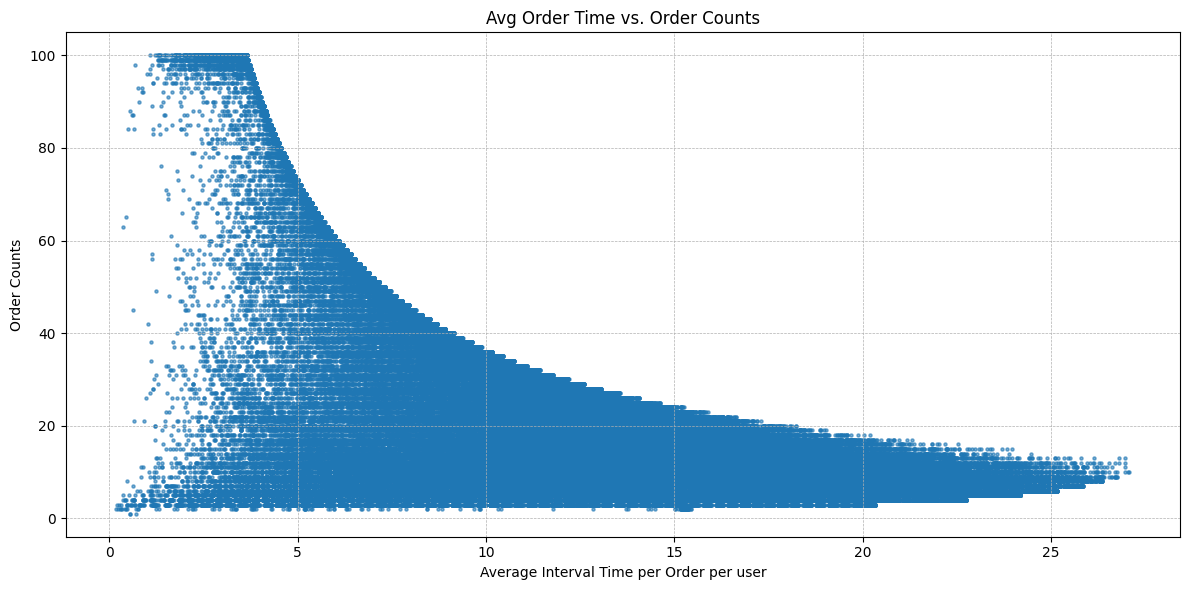

In [ ]:
# Scatter avg_order_time vs. total orders per user
plt.figure(figsize=(12, 6))
plt.scatter(
    user_stats_df['avg_order_time'],
    user_stats_df['order_counts'],    # if you meant total orders per user
    s=5,
    alpha=0.6
)
plt.xlabel('Average Interval Time per Order per user')
plt.ylabel('Order Counts')
plt.title('Avg Order Time vs. Order Counts')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


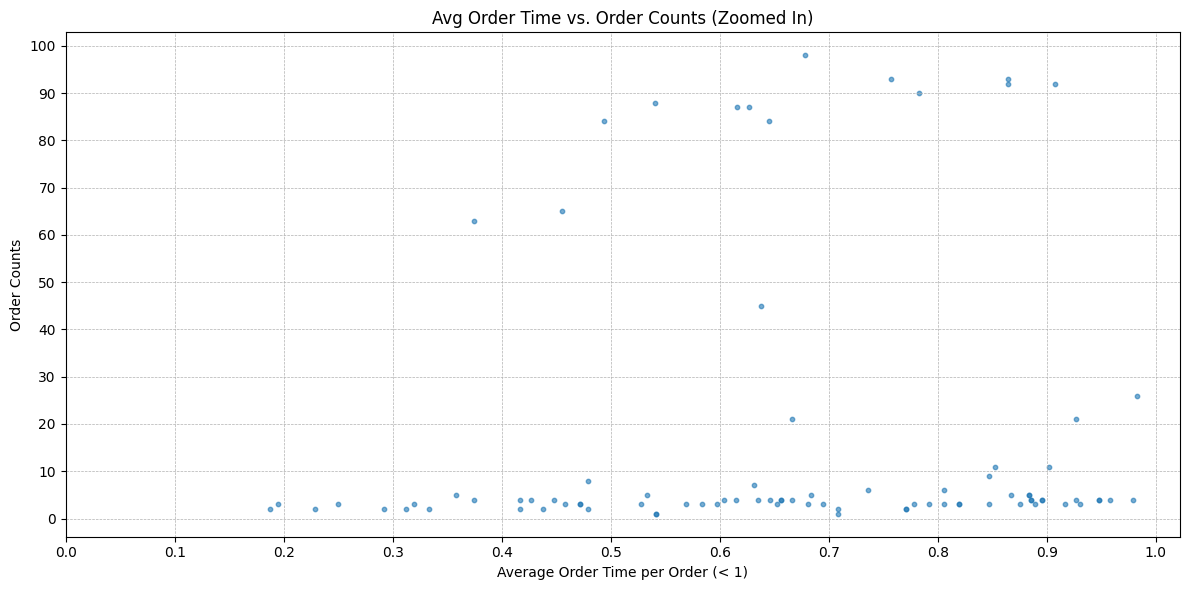

In [ ]:
import numpy as np
# Filter the DataFrame
min_time = 1
filtered_df = user_stats_df[user_stats_df['avg_order_time'] < min_time]

# Scatter plot of the filtered data
plt.figure(figsize=(12, 6))
plt.scatter(
    filtered_df['avg_order_time'],
    filtered_df['order_counts'],
    s=10,
    alpha=0.6
)
plt.xlabel(f'Average Order Time per Order (< {min_time})')
plt.ylabel('Order Counts')
plt.title('Avg Order Time vs. Order Counts (Zoomed In)')
plt.yticks(range(0, 110, 10))
# Use np.arange for float-based ticks
plt.xticks(np.arange(0, min_time+0.1, 0.1))  # From 0 to 2 in steps of 0.1
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
user_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         206209 non-null  uint32 
 1   order_counts    206209 non-null  int64  
 2   max_timestamp   206209 non-null  float32
 3   avg_order_time  206209 non-null  float64
dtypes: float32(1), float64(1), int64(1), uint32(1)
memory usage: 4.7 MB


In [ ]:
user_stats_df.to_pickle('all_user_stats_df.pkl')

In [ ]:
# prompt: filter from user_stats_df those rows with at least 5 but no more than 200 order_counts

user_stats_filtered = user_stats_df[(user_stats_df['order_counts'] >= 5) & (user_stats_df['order_counts'] <= 200)].copy()

print("Filtered user stats info:")
user_stats_filtered.info()

print("\nFiltered user stats head:")
print(user_stats_filtered.head())

Filtered user stats info:
<class 'pandas.core.frame.DataFrame'>
Index: 174615 entries, 0 to 206208
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         174615 non-null  uint32 
 1   order_counts    174615 non-null  int64  
 2   max_timestamp   174615 non-null  float32
 3   avg_order_time  174615 non-null  float64
dtypes: float32(1), float64(1), int64(1), uint32(1)
memory usage: 5.3 MB

Filtered user stats head:
   user_id  order_counts  max_timestamp  avg_order_time
0        1            11     190.333328       17.303030
1        2            15     228.458328       15.230555
2        3            12     133.625000       11.135417
4        5             5      46.458332        9.291666
6        7            21     209.458328        9.974206


In [ ]:
user_stats_filtered.to_pickle('MTTP_eligible_user_stats_df_filtered.pkl')

In [ ]:
user_stats_filtered = pd.read_pickle('MTTP_eligible_user_stats_df_filtered.pkl')

In [ ]:
MTTP_eligible_user_id_list= user_stats_filtered['user_id'].tolist()

In [ ]:
import random

# assuming your list is named `MTTP_eligible_user_id_list`
n = 2000
if len(MTTP_eligible_user_id_list) < n:
    raise ValueError(f"Cannot sample {n} users from a list of size {len(MTTP_eligible_user_id_list)}")

sampled_users = random.sample(MTTP_eligible_user_id_list, n)

# Optional: inspect
print(len(sampled_users), "users sampled")
print(sampled_users[:10])


2000 users sampled
[20261, 193110, 185128, 145994, 4322, 88770, 37271, 133482, 43223, 25071]


In [ ]:
# prompt: from df, extract all rows that has user_id in list sampled_users

df_sampled = df[df['user_id'].isin(sampled_users)].copy()

print("Sampled DataFrame info:")
df_sampled.info()

print("\nSampled DataFrame head:")
print(df_sampled.head())

Sampled DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 37999 entries, 267 to 3325060
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                37999 non-null  uint32 
 1   user_id                 37999 non-null  uint32 
 2   order_number            37999 non-null  uint8  
 3   order_dow               37999 non-null  uint8  
 4   order_hour_of_day       37999 non-null  uint8  
 5   days_since_prior_order  37999 non-null  uint8  
 6   cumsum_day              37999 non-null  uint16 
 7   timestamp               37999 non-null  float32
 8   order_details           37999 non-null  object 
 9   store_number            37999 non-null  uint8  
 10  order_number_new        37999 non-null  uint8  
dtypes: float32(1), object(1), uint16(1), uint32(2), uint8(6)
memory usage: 1.3+ MB

Sampled DataFrame head:
     order_id  user_id  order_number  order_dow  order_hour_of_day  \


In [ ]:
# prompt: create a sub sample folder named with today's date and sample

import os
import datetime

# Get today's date in YYYY-MM-DD format
today_date = datetime.date.today().strftime("%Y-%m-%d")

# Define the base directory where you want to create the subfolder
base_dir = '.' # Use '.' for the current working directory, or provide a specific path

# Create the new subfolder name
subfolder_name = f"{today_date}_sample"

# Construct the full path for the new subfolder
new_subfolder_path = os.path.join(base_dir, subfolder_name)

# Create the subfolder if it doesn't exist
os.makedirs(new_subfolder_path, exist_ok=True)

print(f"Created subfolder: {new_subfolder_path}")

# Optional: Change the current working directory to the new subfolder
os.chdir(new_subfolder_path)
print(f"Current working directory changed to: {os.getcwd()}")

pd.Series(MTTP_eligible_user_id_list).to_pickle('MTTP_eligible_user_id_list.pkl')
df_sampled.to_pickle('sampled_data.pkl')
print(f"Saved sampled data to: {os.path.join(new_subfolder_path, 'sampled_data.pkl')}")

Created subfolder: ./2025-06-27_sample
Current working directory changed to: /content/drive/MyDrive/Instacart_TPP/LLM_MTTP/01/2025-06-27_sample
Saved sampled data to: ./2025-06-27_sample/sampled_data.pkl
